In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "14n4N5sfDjZUgnaL_OBgRxeberHNO-Ua2"
output_file = "Bear_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=14n4N5sfDjZUgnaL_OBgRxeberHNO-Ua2
From (redirected): https://drive.google.com/uc?id=14n4N5sfDjZUgnaL_OBgRxeberHNO-Ua2&confirm=t&uuid=d673c9ed-4aca-4064-a6bb-41a86c59a017
To: /content/Bear_Datasets.zip
100%|██████████| 133M/133M [00:03<00:00, 42.8MB/s]


'Bear_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Bear_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Bear_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Bear_Datasets' to 'datasets/Bear_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Bear_Datasets',
    'train': 'train/images',
    'val': 'train/images',
    'test': 'test/images',
    'nc': 1,
    'names': ['Bear']
}

# Save to pothole.yaml
with open('bear.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("bear.yaml created successfully!")


bear.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolov9m.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint
model.train(
    data='bear.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='bear_yolov8',
    save=True,
    save_period=-1,  # Don't save every epoch
    patience=20,     # Early stopping if no improvement for 20 epochs (optional)
    val=False         # Run validation during training to select best model
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 39.1M/39.1M [00:00<00:00, 46.2MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bear.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bear_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       


  7                  -1  1   1556160  ultralytics.nn.modules.block.AConv           [360, 480]                    
  8                  -1  1   2511840  ultralytics.nn.modules.block.RepNCSPELAN4    [480, 480, 480, 240, 1]       
  9                  -1  1    577440  ultralytics.nn.modules.block.SPPELAN         [480, 480, 240]               
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1   1586880  ultralytics.nn.modules.block.RepNCSPELAN4    [840, 360, 360, 180, 1]       
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    715920  ultralytics.nn.modules.block.RepNCSPELAN4    [600,

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 80.8±94.5 MB/s, size: 87.9 KB)


train: Scanning /content/datasets/Bear_Datasets/train/labels... 1521 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1521/1521 [00:02<00:00, 612.48it/s]


train: New cache created: /content/datasets/Bear_Datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 40.8±32.3 MB/s, size: 72.6 KB)


val: Scanning /content/datasets/Bear_Datasets/train/labels.cache... 1521 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1521/1521 [00:00<?, ?it/s]


Plotting labels to runs/detect/bear_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bear_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.16G     0.9906      1.219      1.489          4        640: 100%|██████████| 191/191 [01:14<00:00,  2.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.23G      1.273      1.319       1.65          4        640: 100%|██████████| 191/191 [01:09<00:00,  2.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.34G      1.259       1.29      1.627          4        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.38G      1.164      1.247      1.567          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.38G      1.117      1.115      1.524          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.38G      1.064      1.051      1.492          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.44G      1.056      1.021      1.478          2        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.44G      0.983     0.9359      1.418          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.44G     0.9748     0.9361      1.408          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.44G     0.9388     0.9005       1.38          2        640: 100%|██████████| 191/191 [01:07<00:00,  2.81it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.48G     0.9175     0.8437      1.376          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.48G     0.8667     0.8289       1.34          3        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.48G     0.8811     0.8069      1.343          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.48G     0.8552     0.7902       1.34          2        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.48G     0.8204     0.7609      1.301          2        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.48G     0.8273     0.7677      1.313          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.48G     0.8071     0.7164      1.285          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.48G      0.811     0.7246      1.308          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.48G     0.8021      0.698      1.288          3        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.48G     0.7724     0.6907      1.274          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.48G     0.8055      0.694      1.295          3        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.48G     0.7801     0.6874      1.264          2        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.48G     0.7583     0.6569       1.26          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.48G     0.7595     0.6491      1.267          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.54G      0.697     0.6137      1.217          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.54G     0.7283     0.6247       1.24          5        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.54G     0.7498     0.6485      1.254          3        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.54G     0.7212     0.6096      1.241          3        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.54G     0.6985     0.5916      1.216          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.54G     0.6925     0.5882      1.224          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.54G     0.6767     0.5868      1.214          3        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.54G     0.6687     0.5681      1.201          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.54G     0.7088     0.5854      1.227          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.54G     0.6583     0.5621      1.198          4        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.54G     0.6617     0.5695      1.207          3        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.54G      0.641     0.5498       1.19          3        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.54G     0.6693     0.5375      1.203          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.54G     0.6452     0.5359      1.201          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.54G      0.637     0.5353      1.184          2        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.54G     0.6275     0.5102      1.177          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.61G     0.5023     0.3893      1.105          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.61G     0.4835     0.3761      1.089          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.61G     0.4815     0.3602      1.078          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.61G     0.4705      0.355       1.07          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.61G     0.4575     0.3371      1.057          2        640: 100%|██████████| 191/191 [01:06<00:00,  2.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.61G     0.4398     0.3251      1.055          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.61G     0.4338     0.3082      1.057          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.61G     0.4328     0.3017      1.048          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.61G     0.4201     0.2997       1.04          1        640: 100%|██████████| 191/191 [01:06<00:00,  2.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.61G     0.4123     0.2908      1.038          1        640: 100%|██████████| 191/191 [01:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:28<00:00,  3.37it/s]


                   all       1521       1681      0.974      0.971      0.992      0.919

50 epochs completed in 1.018 hours.
Optimizer stripped from runs/detect/bear_yolov8/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/bear_yolov8/weights/best.pt, 40.8MB

Validating runs/detect/bear_yolov8/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 151 layers, 20,013,715 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:24<00:00,  3.90it/s]


                   all       1521       1681      0.974      0.971      0.992      0.919
Speed: 0.2ms preprocess, 11.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/bear_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f26ad1f36d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
def draw_boxes(image, box, label, color_sample):

    image_with_boxes = image.copy()

    xmin, ymin, xmax, ymax = map(int, box)

    # Ensure correct indexing
    color = random.choice(color_sample)

    # Draw bounding box
    cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), color, 2)

    # Draw label text
    text = label
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_w, text_h = text_size

    # Adjust text position to prevent out-of-bounds
    ymin_text = max(ymin - text_h - 5, 0)

    # Background rectangle for text
    cv2.rectangle(image_with_boxes, (xmin, ymin_text-5), (xmin + text_w + 10, ymin), color, -1)

    # Put text on the image with white color for better visibility
    cv2.putText(
        image_with_boxes,
        text,
        (xmin + 5, ymin - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),  # White text
        2,
        cv2.LINE_AA,
    )

    return image_with_boxes


image 1/1 /content/datasets/Bear_Datasets/test/30UFuChH06tT.png: 448x640 2 Bears, 57.0ms
Speed: 3.3ms preprocess, 57.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Bear_Datasets/test/gxAhcVzJLEyn.png: 448x640 1 Bear, 31.0ms
Speed: 3.6ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Bear_Datasets/test/gxAhcVzJLEyn.png: 448x640 1 Bear, 31.2ms
Speed: 3.5ms preprocess, 31.2ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Bear_Datasets/test/9zuSkAJSAKO9.png: 384x640 2 Bears, 96.4ms
Speed: 2.9ms preprocess, 96.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/datasets/Bear_Datasets/test/2nIgvn3YjbwC.png: 480x640 1 Bear, 105.2ms
Speed: 5.4ms preprocess, 105.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/datasets/Bear_Datasets/test/OvOOjK08djo5.png: 

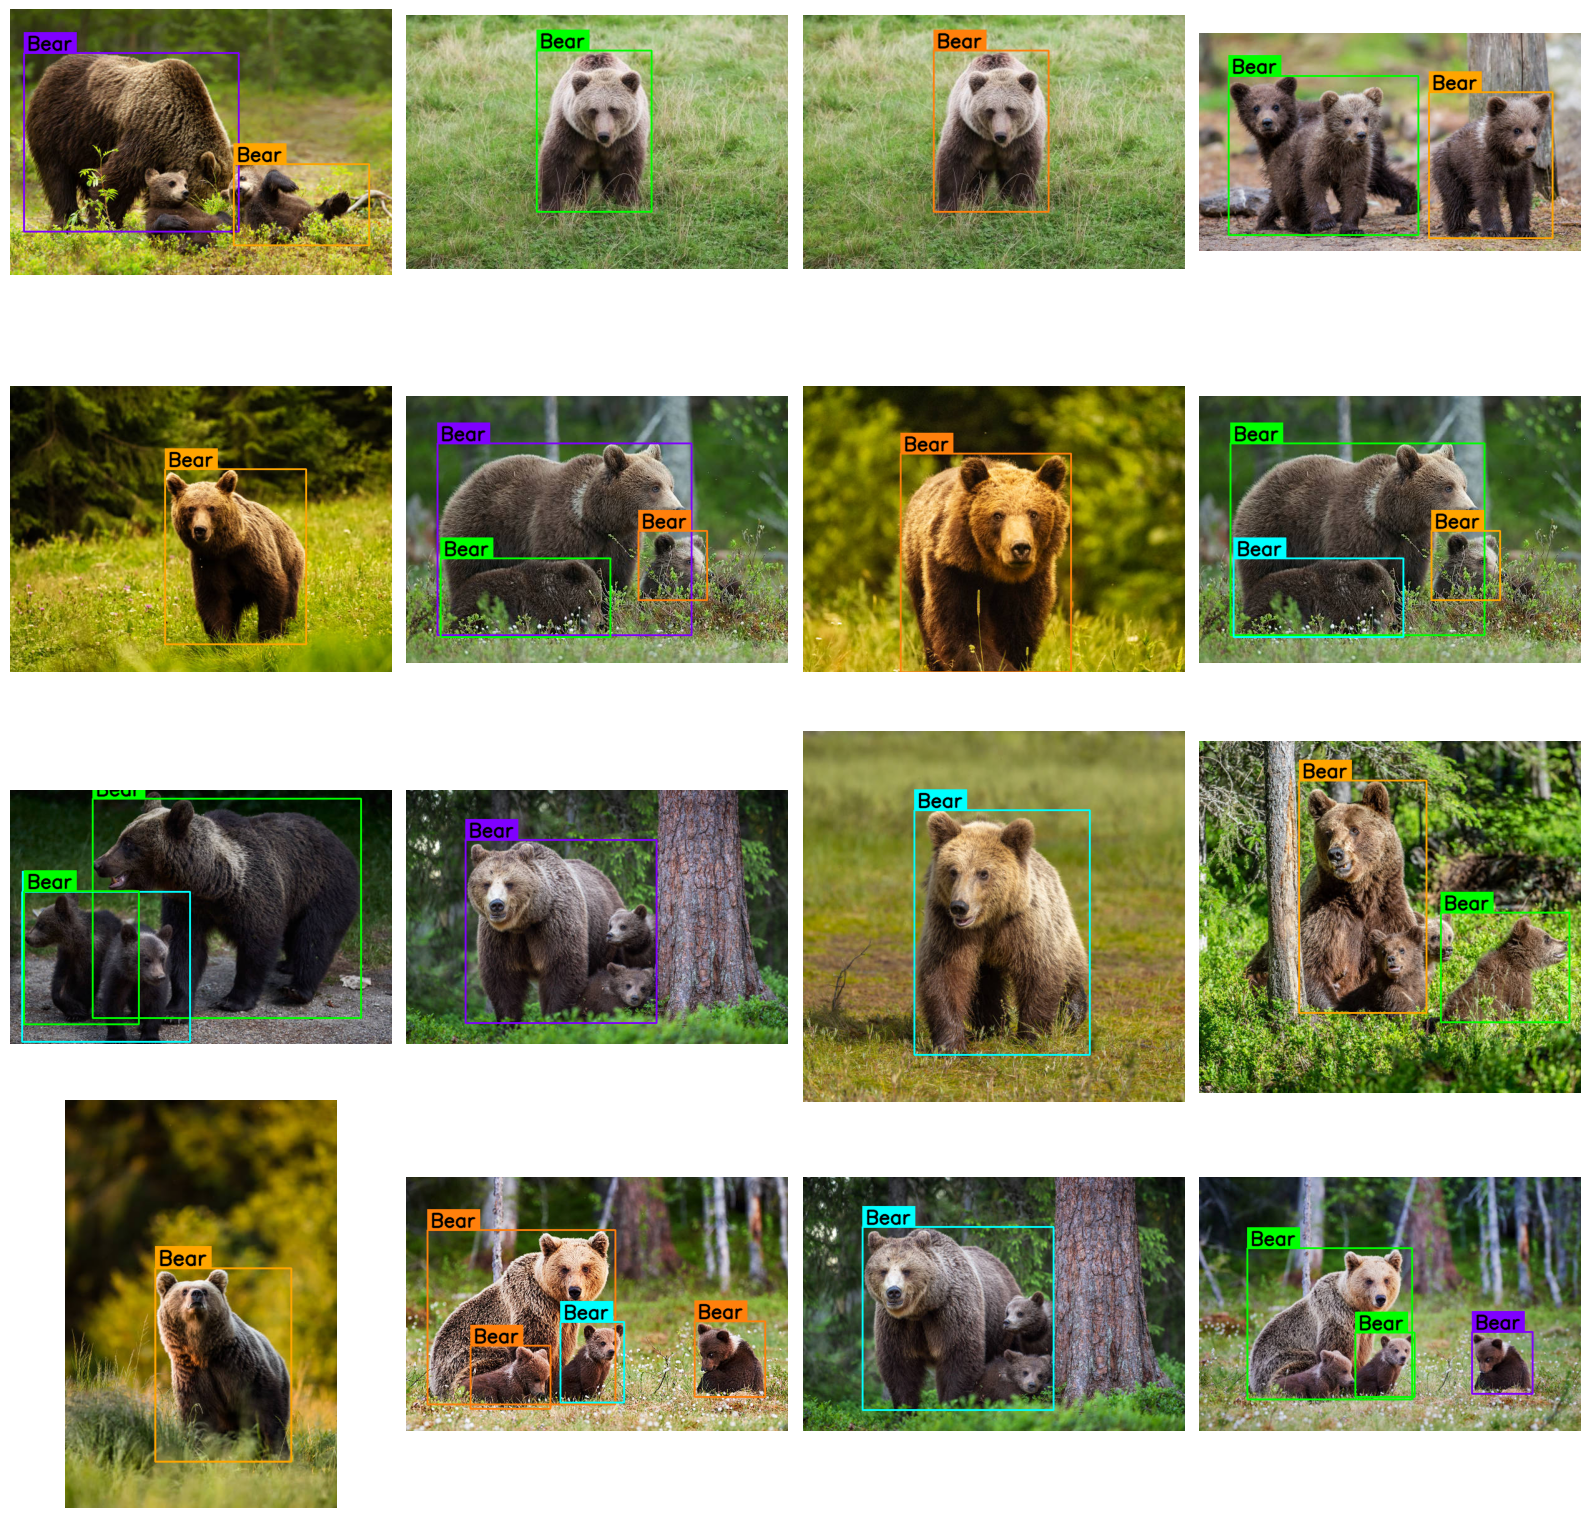

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/detect/bear_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Bear_Datasets/test'

color_sample = [
    (12, 128, 255),   # Orange-ish
    (255, 0, 127),    # Pink
    (0, 255, 0),      # Green
    (255, 255, 0),    # Cyan
    (0, 165, 255)     # Blue-ish
]

# Get list of test images (max 16)
image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)

    # Inference
    results = model(img_path)[0]  # Get first result (one image)

    # Draw each box if confidence > 0.8
    for box in results.boxes:

        xyxy = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        image = draw_boxes(image, xyxy, label, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
